In [1]:
import pandas as pd


In [3]:
data = pd.read_csv("3days.csv")

In [4]:
addresses = set()
(data[["from_address", "to_address"]].apply(lambda x: addresses.add(x.from_address) and addresses.add(x.to_address), axis=1))

0          None
1          None
2          None
3          None
4          None
           ... 
3344353    None
3344354    None
3344355    None
3344356    None
3344357    None
Length: 3344358, dtype: object

In [8]:
uniques_address = len(addresses)

In [9]:
uniques_address / 3344358 * 2

0.47364068081228144

In [15]:
import seaborn as sns

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [16]:
data.columns

Index(['block_timestamp', 'transaction_hash', 'transaction_index', 'nonce',
       'from_address', 'to_address', 'value', 'value_lossless', 'gas',
       'gas_price', 'max_fee_per_gas', 'max_priority_fee_per_gas',
       'transaction_type'],
      dtype='object')

In [19]:
senders = data['from_address'].value_counts()

In [36]:
senders

0xea674fdde714fd979de3edf0f56aa9716b898ec8    64920
0xb5d85cbf7cb3ee0d56b3bb207d5fc4b82f43f511    38995
0x3cd751e6b0078be393132286c442345e5dc49699    35953
0xddfabcdc4d8ffc6d5beaf154f18b778f892a0740    29659
0xeb2629a2734e272bcc07bda959863f316f4bd4cf    27795
                                              ...  
0x47454f28db34a3a73087e81609deedf8c3172f44        1
0xd927f37684a27baa8e42fe206602281f796f8feb        1
0xbff9346c0154a5c88413e31ec6cc7c3f9a636647        1
0x53dde331ccf1982c25c2810a0081cd78a41e02b1        1
0x82b8c30d4c8f643beb70c976d180a5506f9df582        1
Name: from_address, Length: 792012, dtype: int64

In [24]:
senders_dist = senders.value_counts()

In [30]:
senders_dist = senders_dist.reset_index()

In [35]:
senders_dist[senders_dist.index >= 10].from_address.sum() / uniques_address

0.0465472745362444

In [57]:
senders[(senders >= 0) & (senders <= 15)]

0xca246a06b1bfbd8d0610e1c80e169eb570b50169    15
0x02b56b480fd9350fc83dbe2918a76c60232b4001    15
0x73c86a9f84b64c91c69c42368967576a67b1a36e    15
0x9d5025b327e6b863e5050141c987d988c07fd8b2    15
0x1bdb7606fc0008c99dcb2784c41af11fe42e07ba    15
                                              ..
0x47454f28db34a3a73087e81609deedf8c3172f44     1
0xd927f37684a27baa8e42fe206602281f796f8feb     1
0xbff9346c0154a5c88413e31ec6cc7c3f9a636647     1
0x53dde331ccf1982c25c2810a0081cd78a41e02b1     1
0x82b8c30d4c8f643beb70c976d180a5506f9df582     1
Name: from_address, Length: 771314, dtype: int64

<Axes: xlabel='from_address', ylabel='Count'>

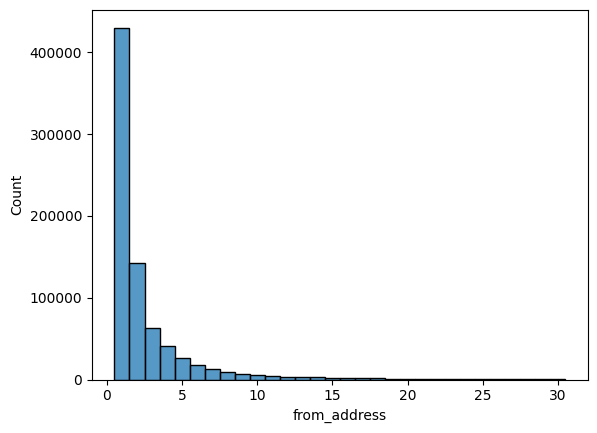

In [64]:
sns.histplot(data=senders[(senders >= 0) & (senders <= 30)], discrete=True)

<Axes: xlabel='from_address', ylabel='Count'>

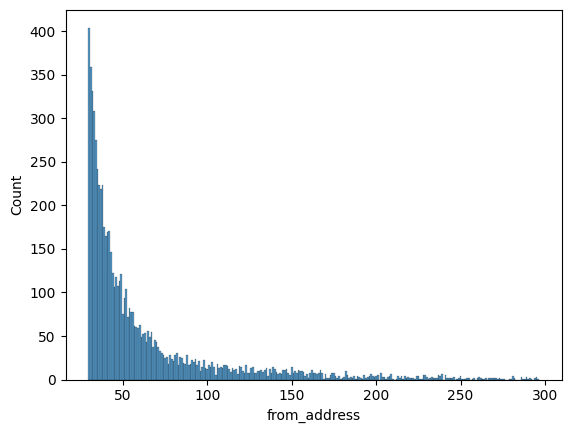

In [66]:
sns.histplot(data=senders[(senders >= 30) & (senders <= 300)], discrete=True)


In [10]:
import networkx as nx

In [76]:
g=nx.Graph()

In [12]:
def armar_grafo(frm, to, g):
    g.add_node(frm)
    g.add_node(to)
    g.add_edge(frm, to)

In [73]:
mas5=set(senders[senders > 5].index)

In [74]:
filtred = data[data.from_address.isin(mas5)]

In [78]:
from tqdm import tqdm
tqdm.pandas()

In [79]:
filtred[["from_address", "to_address"]].progress_apply(lambda x: armar_grafo(x.from_address, x.to_address,g ), axis=1)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2148327/2148327 [01:24<00:00, 25367.73it/s]


1          None
2          None
3          None
6          None
8          None
           ... 
3344342    None
3344344    None
3344346    None
3344349    None
3344351    None
Length: 2148327, dtype: object

In [81]:
pos = nx.spring_layout(g)

node_size = 5  # Tamaño de los nodos
node_color = 'b'  # Color de los nodos
edge_width = 0.1  # Grosor de los enlaces
edge_color = 'gray'  # Color de los enlaces

# Dibujar el grafo
nx.draw(g, pos, node_size=node_size, node_color=node_color, width=edge_width, edge_color=edge_color, with_labels=False)

# Mostrar la visualización
plt.axis('off')  # Ocultar ejes
plt.show()

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
    plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(g,"my_graph.pdf")